<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino
            </font></p>
                        <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ignacio Zambrano &bull; 15-12-2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [1]:
import pandas as pd  # Manejo de datos
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva
import gdown

from sklearn.preprocessing import StandardScaler  # Estandarización de datos

from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.manifold import Isomap
from sklearn.metrics import silhouette_score, silhouette_samples

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

1.  Cargar el conjunto de datos

In [2]:
url = "https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY"
output = "nanotox_dataset.csv"

gdown.download(url, output, quiet=False)

# Cargamos el dataset
df = pd.read_csv(output)

print("Dimensión del dataset:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

Downloading...
From: https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY
To: c:\Users\ignaz\OneDrive\Desktop\Quinto semestre\apendizaje automatico\AprendizajeAutomatico\nanotox_dataset.csv
100%|██████████| 44.1k/44.1k [00:00<00:00, 494kB/s]

Dimensión del dataset: (881, 11)

Columnas:
['NPs', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen', 'class']


Analisis rápido

In [3]:
# Tipos y nulos
print("\nINFO:")
print(df.info())

print("\nNulos por columna:")
print(df.isna().sum().sort_values(ascending=False))

# Duplicados
print("\nDuplicados:", df.duplicated().sum())

# Revisión de valores únicos en variables clave
for col in ["NPs", "class"]:
    if col in df.columns:
        print(f"\nValores únicos en {col} (top 20):")
        display(df[col].value_counts().head(20))

# Estadísticos descriptivos solo numéricos
num_df = df.select_dtypes(include=[np.number])
print("\nResumen numérico (describe):")
display(num_df.describe().T)

# Intento de detectar columnas numéricas guardadas como texto
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("\nColumnas tipo object:", obj_cols)




INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB
None

Nulos por columna:
NPs           0
coresize      0
hydrosize     0
surfcharge    0
surfarea      0
Ec            0
Expotime      0
dosage        0
e             0
NOxygen       0
class         0
dtype: int64

Duplicados: 487

Valores únicos en NPs (top 20):


NPs
ZnO      594
TiO2     200
CuO       51
Al2O3     18
Fe2O3     18
Name: count, dtype: int64


Valores únicos en class (top 20):


class
Toxic       476
nonToxic    405
Name: count, dtype: int64


Resumen numérico (describe):


,count,mean,std,min,25%,50%,75%,max
coresize,881.0,56.313280,33.700297,7.50000,32.00,45.30,86.00,125.00
hydrosize,881.0,513.781385,346.601373,74.00000,273.40,327.00,687.00,1843.00
surfcharge,881.0,1.642111,25.635780,-41.60000,-11.70,-9.30,29.40,42.80
surfarea,881.0,42.074075,47.111739,7.00000,15.00,24.10,42.50,210.00
Ec,881.0,-4.018127,0.509806,-5.17000,-4.16,-3.89,-3.89,-1.51
Expotime,881.0,27.459705,19.534667,3.00000,12.00,24.00,24.00,72.00
dosage,881.0,39.651270,38.163289,0.00001,10.00,25.00,50.00,300.00
e,881.0,1.646050,0.089304,1.54000,1.65,1.65,1.65,1.90
NOxygen,881.0,1.308740,0.543581,1.00000,1.00,1.00,2.00,3.00



Columnas tipo object: ['NPs', 'class']


2. Mostrar Datos

In [4]:
print("\nPrimeras filas del dataset:")
display(df.head())

print("\nDescripción estadística (variables numéricas):")
display(df.describe())


Primeras filas del dataset:


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic



Descripción estadística (variables numéricas):


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740
std,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000
50%,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000
75%,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


3. Escalamiento de los datos

In [5]:
# Seleccionamos SOLO variables numéricas (excluimos 'class' y 'NPs')
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nColumnas numéricas utilizadas para clustering:")
print(num_cols)

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Convertimos a DataFrame para mejor lectura
df_scaled = pd.DataFrame(X_scaled, columns=num_cols)

print("\nPrimeras filas de los datos escalados:")
display(df_scaled.head())



Columnas numéricas utilizadas para clustering:
['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']

Primeras filas de los datos escalados:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
0,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039554,-0.403904,3.113097
1,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039318,-0.403904,3.113097
2,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.036958,-0.403904,3.113097
3,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.013362,-0.403904,3.113097
4,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-0.908490,-0.403904,3.113097


---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


1. Cálculo de la inercia para distintos valores de k

In [6]:
# Datos para K-Means
X = df_scaled.values

# Rango de k
k_values = range(1, 11)
inertia = []

# Cálculo de inercia
for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

2. Gráfica del método del codo

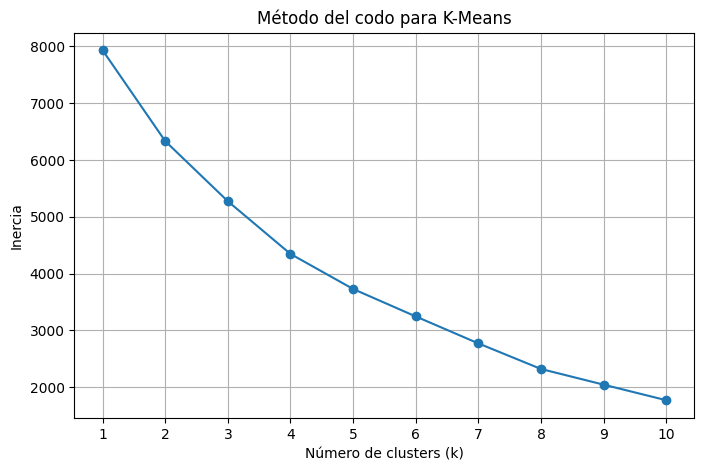

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo para K-Means")
plt.xticks(k_values)
plt.grid(True)
plt.show()


A partir del método del codo se observa que la reducción de la inercia es significativa hasta k = 4, y a partir de ese punto la curva se estabiliza. Por ello, k = 4 o k = 5 se consideran valores óptimos, ya que añadir más clústeres no mejora de forma relevante la calidad del agrupamiento.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

1. Entrenamiento del modelo K-Means y asignación de grupos

In [8]:
# Número de clusters elegido
k = 4

# Modelo K-Means
kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

# Ajuste y predicción
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Añadimos los clusters al dataset original
df_kmeans = df.copy()
df_kmeans["cluster"] = clusters_kmeans

print("Número de clusters:", df_kmeans["cluster"].nunique())
df_kmeans["cluster"].value_counts().sort_index()

Número de clusters: 4


cluster
0    211
1    321
2    285
3     64
Name: count, dtype: int64

2. Media de cada grupo


In [9]:
# Columnas numéricas
num_cols = df_scaled.columns

# Media por cluster
cluster_means = df_kmeans.groupby("cluster")[num_cols].mean()

print("Media de cada grupo:")
display(cluster_means)

Media de cada grupo:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
cluster,,,,,,,,,
0,29.336019,479.241706,-10.307583,91.329384,-4.004739,16.834123,49.709689,1.570711,2.170616
1,86.762617,353.521495,-18.523053,19.801558,-3.902617,27.364486,41.209658,1.644860,1.046729
2,44.238947,781.561404,23.958947,34.730035,-3.899474,37.389474,28.784218,1.646140,1.035088
3,46.300000,239.000000,42.800000,24.100000,-5.170000,18.750000,47.065969,1.900000,1.000000


3. Mínimo y máximo de cada grupo

In [10]:
# Mínimos por cluster
cluster_min = df_kmeans.groupby("cluster")[num_cols].min()

# Máximos por cluster
cluster_max = df_kmeans.groupby("cluster")[num_cols].max()

print("Mínimos por grupo:")
display(cluster_min)

print("Máximos por grupo:")
display(cluster_max)

Mínimos por grupo:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
cluster,,,,,,,,,
0,10.0,74.0,-35.5,40.00,-4.99,3,0.00001,1.54,2
1,35.6,236.0,-41.6,7.34,-4.16,3,0.00001,1.54,1
2,7.5,310.0,-35.5,7.00,-4.16,12,0.00001,1.54,1
3,46.3,239.0,42.8,24.10,-5.17,12,0.00100,1.90,1


Máximos por grupo:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
cluster,,,,,,,,,
0,42.5,1843.0,36.3,210.0,-1.51,48,300.0,1.83,3
1,125.0,1054.0,-7.5,38.0,-3.89,72,100.0,1.65,2
2,86.0,1843.0,32.7,90.0,-3.89,72,100.0,1.65,2
3,46.3,239.0,42.8,24.1,-5.17,24,100.0,1.90,1


4. Mostrar algunos integrantes de cada grupo

In [11]:

for c in sorted(df_kmeans["cluster"].unique()):
    print(f"\nCluster {c} (primeras 5 observaciones):")
    display(
        df_kmeans[df_kmeans["cluster"] == c]
        .head(5)
    )



Cluster 0 (primeras 5 observaciones):


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class,cluster
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic,0
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic,0
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic,0
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic,0
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic,0



Cluster 1 (primeras 5 observaciones):


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class,cluster
210,TiO2,125.0,1054.0,-40.8,38.0,-4.16,72,0.00001,1.54,2,nonToxic,1
211,TiO2,125.0,1054.0,-40.8,38.0,-4.16,72,6.25000,1.54,2,nonToxic,1
212,TiO2,125.0,1054.0,-40.8,38.0,-4.16,72,12.50000,1.54,2,nonToxic,1
213,TiO2,125.0,1054.0,-40.8,38.0,-4.16,72,25.00000,1.54,2,nonToxic,1
214,TiO2,125.0,1054.0,-40.8,38.0,-4.16,72,50.00000,1.54,2,Toxic,1



Cluster 2 (primeras 5 observaciones):


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class,cluster
190,TiO2,35.0,1814.0,-35.5,66.0,-4.16,72,0.00001,1.54,2,nonToxic,2
191,TiO2,35.0,1814.0,-35.5,66.0,-4.16,72,6.25000,1.54,2,nonToxic,2
192,TiO2,35.0,1814.0,-35.5,66.0,-4.16,72,12.50000,1.54,2,nonToxic,2
193,TiO2,35.0,1814.0,-35.5,66.0,-4.16,72,25.00000,1.54,2,nonToxic,2
194,TiO2,35.0,1814.0,-35.5,66.0,-4.16,72,50.00000,1.54,2,nonToxic,2



Cluster 3 (primeras 5 observaciones):


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class,cluster
18,CuO,46.3,239.0,42.8,24.1,-5.17,24,0.001,1.9,1,nonToxic,3
19,CuO,46.3,239.0,42.8,24.1,-5.17,24,0.010,1.9,1,nonToxic,3
20,CuO,46.3,239.0,42.8,24.1,-5.17,24,0.100,1.9,1,nonToxic,3
21,CuO,46.3,239.0,42.8,24.1,-5.17,24,1.000,1.9,1,nonToxic,3
22,CuO,46.3,239.0,42.8,24.1,-5.17,24,5.000,1.9,1,nonToxic,3


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**Cluster 0** – Nanopartículas de alta superficie y carga negativa

(211 observaciones)

Este grupo está conformado por nanopartículas de tamaño de núcleo pequeño a medio, con área superficial elevada y carga superficial mayoritariamente negativa. Presenta una amplia variabilidad en el tamaño hidrodinámico y en la dosis, así como un mayor número promedio de átomos de oxígeno, lo que sugiere estructuras químicas más complejas.

Nombre asignado: NPs de alta superficie y carga negativa

**Cluster 1** – Nanopartículas grandes con carga negativa y exposición prolongada

(321 observaciones)

Este cluster agrupa nanopartículas con tamaños de núcleo grandes, carga superficial negativa marcada y baja área superficial. Además, presenta mayores tiempos de exposición promedio, lo que indica condiciones experimentales más prolongadas y controladas. La mayoría corresponde a un tipo específico de nanopartícula bajo parámetros similares.

Nombre asignado: NPs grandes de carga negativa y alta exposición

**Cluster 2** – Nanopartículas altamente dispersas y carga positiva moderada

(285 observaciones)

Este grupo se caracteriza por un tamaño hidrodinámico muy alto, carga superficial positiva moderada y área superficial intermedia. Presenta los mayores tiempos de exposición promedio y una dosis media menor, lo que sugiere partículas altamente dispersas en el medio.

Nombre asignado: NPs altamente dispersas de carga positiva moderada

**Cluster 3** – Nanopartículas altamente cargadas y homogéneas

(64 observaciones)

Este cluster es el más compacto y homogéneo, con valores prácticamente constantes en tamaño, carga superficial positiva alta y energía. Corresponde principalmente a un tipo específico de nanopartícula bajo condiciones experimentales bien definidas, mostrando muy poca variabilidad interna.

Nombre asignado: NPs altamente cargadas y homogéneas

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

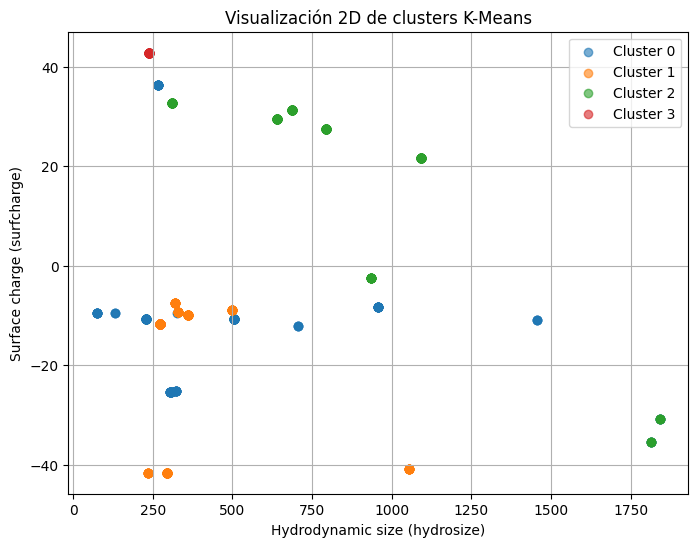

In [12]:
plt.figure(figsize=(8, 6))

for c in sorted(df_kmeans["cluster"].unique()):
    subset = df_kmeans[df_kmeans["cluster"] == c]
    plt.scatter(
        subset["hydrosize"],
        subset["surfcharge"],
        label=f"Cluster {c}",
        alpha=0.6
    )

plt.xlabel("Hydrodynamic size (hydrosize)")
plt.ylabel("Surface charge (surfcharge)")
plt.title("Visualización 2D de clusters K-Means")
plt.legend()
plt.grid(True)
plt.show()

Gráfico interactivo

In [13]:
fig = px.scatter(
    df_kmeans,
    x="hydrosize",
    y="surfcharge",
    color="cluster",
    title="Clusters K-Means (hydrosize vs surfcharge)",
    opacity=0.7
)

fig.show()

En la visualización 2D se observa un fuerte solapamiento entre los clusters, lo que indica que los grupos no están bien separados al considerar solo estas dos variables. Esto sugiere que la estructura de los clusters depende de múltiples dimensiones y que la proyección no refleja completamente la calidad del agrupamiento.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

Isomap a 2 dimensiones

In [14]:
isomap = Isomap(
    n_components=2,
    n_neighbors=10
)

X_iso = isomap.fit_transform(df_scaled)

# DataFrame
df_iso = pd.DataFrame(
    X_iso,
    columns=["ISO1", "ISO2"]
)

df_iso["cluster"] = df_kmeans["cluster"]

C:\Users\ignaz\AppData\Roaming\Python\Python312\site-packages\sklearn\manifold\_isomap.py:384: UserWarning:

The number of connected components of the neighbors graph is 34 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

C:\Users\ignaz\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

C:\Users\ignaz\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

C:\Users\ignaz\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

C:\Users\ignaz\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_index.py

Varianza explicada (aproximada en Isomap)

Isomap permite aproximar la varianza usando los autovalores del embedding

In [15]:
kp = isomap.kernel_pca_

# Compatibilidad entre versiones
eigs = getattr(kp, "eigenvalues_", None)
if eigs is None:
    eigs = getattr(kp, "lambdas_", None)

if eigs is None:
    print("No se pudo obtener eigenvalues_/lambdas_ en esta versión. (Ver nota abajo)")
else:
    evr = eigs / np.sum(eigs)
    print(f"Varianza explicada por ISO1: {evr[0]*100:.2f}%")
    print(f"Varianza explicada por ISO2: {evr[1]*100:.2f}%")
    print(f"Varianza total explicada (2D): {(evr[0]+evr[1])*100:.2f}%")

Varianza explicada por ISO1: 93.14%
Varianza explicada por ISO2: 6.86%
Varianza total explicada (2D): 100.00%


Plot 2D

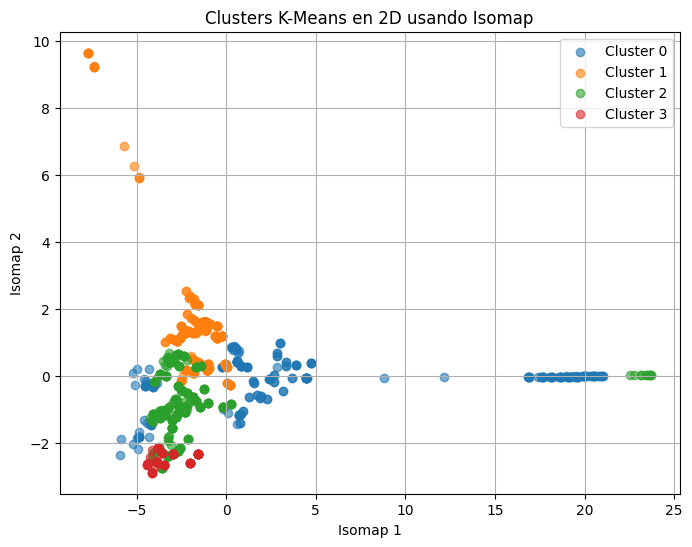

In [16]:
plt.figure(figsize=(8,6))
for c in sorted(df_iso["cluster"].unique()):
    subset = df_iso[df_iso["cluster"] == c]
    plt.scatter(subset["ISO1"], subset["ISO2"], label=f"Cluster {c}", alpha=0.6)

plt.xlabel("Isomap 1")
plt.ylabel("Isomap 2")
plt.title("Clusters K-Means en 2D usando Isomap")
plt.legend()
plt.grid(True)
plt.show()

Se utilizó Isomap para la visualización 2D, el cual explica aproximadamente el 100% de la varianza. Sin embargo, los clusters presentan solapamiento y puntos dispersos, lo que indica que los grupos no están bien definidos. Aunque la alta varianza explicada mejora la concentración de los datos, no se traduce en una separación clara de los clusters.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

Cálculo del coeficiente de silueta promedio

In [17]:
X = df_scaled.values
labels = df_kmeans["cluster"].values

# Silueta promedio
silhouette_avg = silhouette_score(X, labels, metric="euclidean")

print("Coeficiente de silueta promedio:", round(silhouette_avg, 4))

Coeficiente de silueta promedio: 0.3034


El coeficiente de silueta promedio es 0.30, lo que indica una separación débil entre los clusters. Esto confirma que los grupos obtenidos con K-Means no están bien definidos y presentan solapamiento, por lo que la calidad del agrupamiento es limitada.